We will implement KNN (K nearest neighbors) algorithm to Wines dataset found inside Sklearn API. We will implement KNN with random parameter and then find best hyperparameter using Gridsearch and train the best model. This is a Multui class classification and We made three categories of classes based on the taste of wines.

  Importing the necessary libraries.

In [0]:
#Import scikit-learn dataset library
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
#importing the metrics module
from sklearn import metrics
%matplotlib inline

Loading the dataset, converting it to Pandas dataframe and checking first 5 rows.

In [2]:
#Load dataset
wine = datasets.load_wine()
data = pd.DataFrame(wine.data)
data.columns = wine.feature_names
data['quality'] = wine.target
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,quality
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Exploratory Data analysis including checking the distribution of numerical features, checking correlation between target variables and other features.

In [4]:
data.describe() #Checking summary statistics of numerical features

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,quality
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [5]:
data.info() #checking the datatype, number of records and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
quality                         178 non-null int64
dtypes: float64(13), int64(1)
memory usage: 19.6 KB


In [9]:
data.corr()['quality'] #checking correaltion of quality with other features.

alcohol                        -0.328222
malic_acid                      0.437776
ash                            -0.049643
alcalinity_of_ash               0.517859
magnesium                      -0.209179
total_phenols                  -0.719163
flavanoids                     -0.847498
nonflavanoid_phenols            0.489109
proanthocyanins                -0.499130
color_intensity                 0.265668
hue                            -0.617369
od280/od315_of_diluted_wines   -0.788230
proline                        -0.633717
quality                         1.000000
Name: quality, dtype: float64

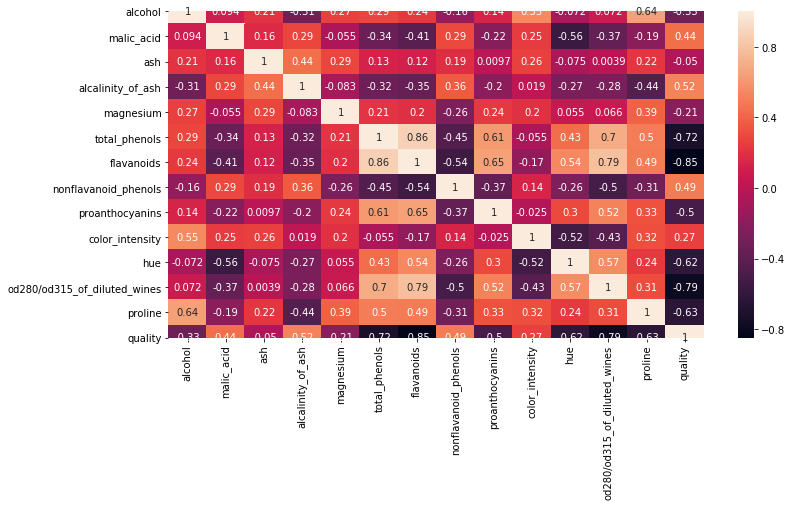

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True)  # Creating the heatmap of correlation seen above.

(array([59.,  0.,  0., 71.,  0.,  0., 48.,  0.,  0.,  0.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

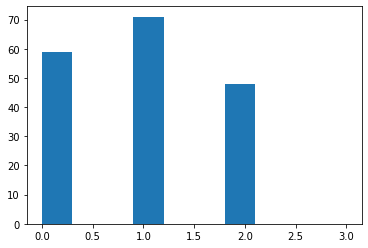

In [14]:
plt.hist(data["quality"].values, range=(0,3)) # Checking the distribution of target classes.

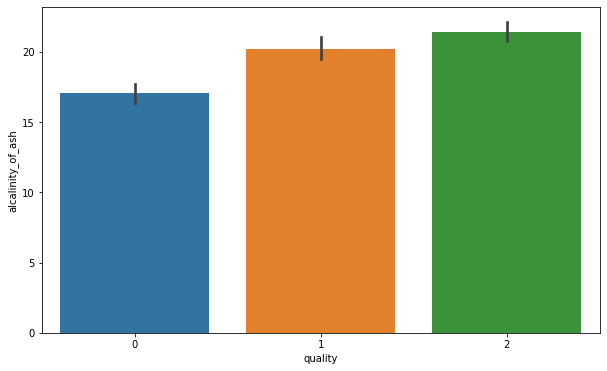

In [16]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcalinity_of_ash', data = data) #Better wines have more alcalinity_of_ash

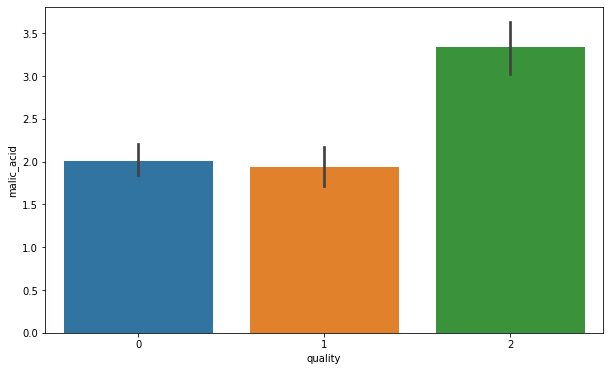

In [18]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'malic_acid', data = data) #Better wines have more  malic acid

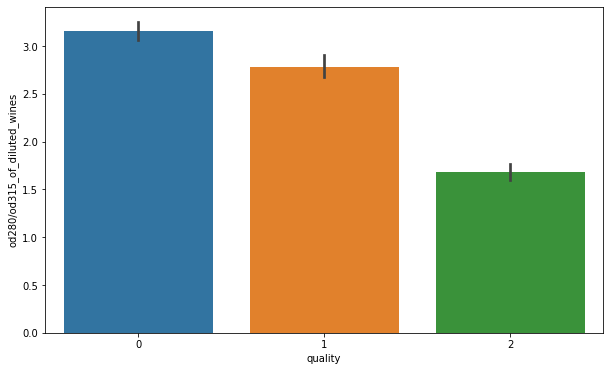

In [21]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'od280/od315_of_diluted_wines', data = data) #Better wines have less od280/od315_of_diluted_wines.


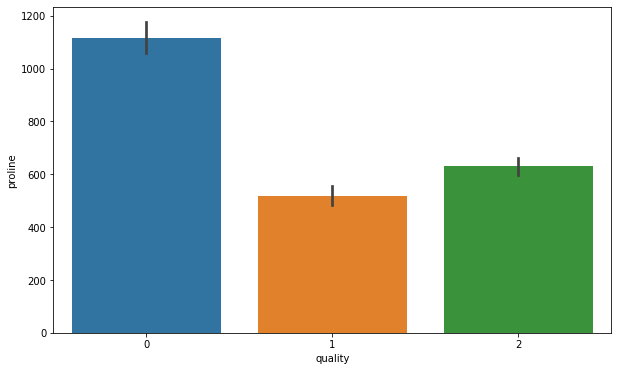

In [20]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'proline', data = data) # No specific relatiopn between proline and quality.

Model Fitting and predictions.

In [0]:
X=data.drop('quality',axis=1) #input
y=data['quality'] #output to be predicted

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=27)

In [0]:

neigh = KNeighborsClassifier(n_neighbors=3) #fitting model
neigh.fit(X_train, y_train) # predictions on training data

#Predict the response for test dataset
y_pred = neigh.predict(X_test)

In [25]:
print(classification_report(y_test, y_pred))
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.87      0.68        15
           1       0.61      0.55      0.58        20
           2       0.54      0.37      0.44        19

    accuracy                           0.57        54
   macro avg       0.57      0.60      0.57        54
weighted avg       0.57      0.57      0.56        54

Accuracy: 0.5740740740740741


  Finding best Hyper parameters to train more accurate model. This will take atleast 15 minutes to run. for standard configuration laptops.

In [28]:
#With Hyper Parameters Tuning

#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 7, 'weights': 'uniform'}
Accuracy: 0.6111111111111112
Confusion Metrix:
 [[12  1  3]
 [ 0 11  6]
 [ 3  8 10]]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Conclusion: The random model gave us the accuracy of 57% but the model trained with tuned parameter gave us accuracy of 61%. 